In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [3]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
X = diabetes_df.drop("glucose",axis=1).values

In [6]:
# X = dataframe.drop("stroke",axis=1).values
y = diabetes_df["glucose"].values

In [7]:
print(type(X),type(y))
print(y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768,)


In [8]:
X_bmi =X[:,6]

In [9]:
X_bmi = X_bmi.reshape(-1, 1)


In [10]:
# #checking shapes to work fine
# y.reshape(-1,1)
# print(y.shape)

C:\Users\bisha\AppData\Local\Temp\ipykernel_20968\2805935795.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


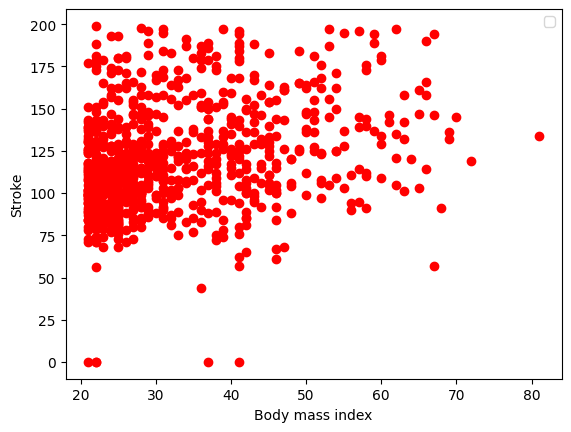

In [11]:
plt.scatter(X_bmi,y,c='r')
plt.xlabel("Body mass index")
plt.ylabel("Stroke")
plt.legend()
plt.savefig('BMI vs Stroke.svg', format='svg')
plt.show()

In [12]:
reg = LinearRegression()
reg.fit(X=X_bmi,y=y)
prediction = reg.predict(X_bmi)

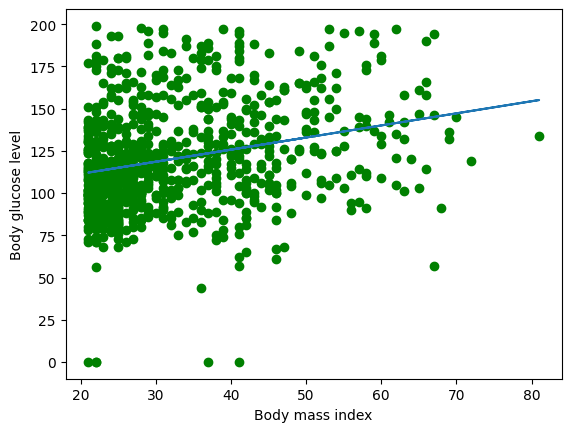

In [13]:
plt.scatter(X_bmi,y, c='green')
plt.plot(X_bmi,prediction)
plt.xlabel("Body mass index")
plt.ylabel("Body glucose level")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.28280468810375115

In [15]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)


26.341459582232265

# Doing it one more time but with style

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('diabetes_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X = df.drop(columns=['diabetes'],axis=1).values
y = df['glucose'].values

In [20]:
X.reshape(-1,1)

array([[  6.   ],
       [148.   ],
       [ 72.   ],
       ...,
       [ 30.4  ],
       [  0.315],
       [ 23.   ]], shape=(6144, 1))

In [21]:
X_bmi = X[:,5].reshape(-1,1)

In [22]:
X_bmi.shape

(768, 1)

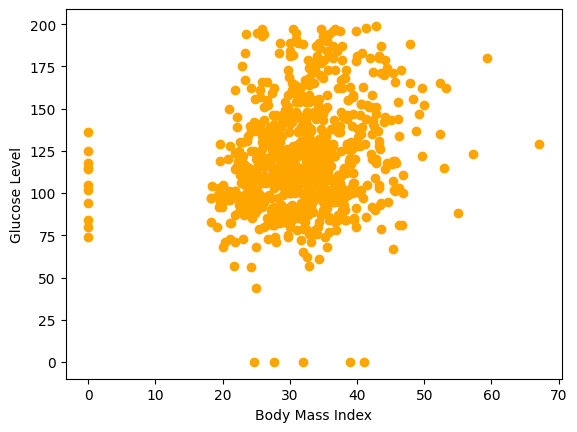

In [23]:
plt.scatter(X_bmi,y,c="orange")
plt.xlabel("Body Mass Index")
plt.ylabel("Glucose Level")
plt.show()

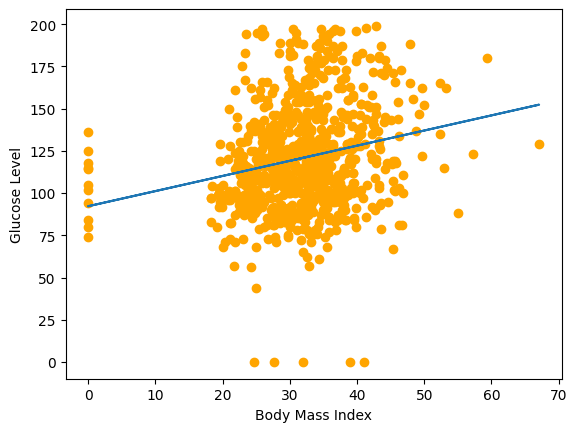

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi,y)
prediction = reg.predict(X_bmi)
plt.scatter(X_bmi,y,c="orange")
plt.plot(X_bmi,prediction)
plt.xlabel("Body Mass Index")
plt.ylabel("Glucose Level")
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv=kf)

In [26]:
for cv in cv_results:
    print(cv)

1.0
1.0
1.0
1.0
1.0
1.0


In [27]:
np.median(cv_results)

np.float64(1.0)